In [72]:
from AutoPyro.digitizers import digitizers
from AutoPyro.core import plots, data, calculators
from shapely import distance
from shapely.geometry import LineString
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
# my_data = data.DataTable.from_file('D:/University/Магистратура/2 курс/Диплом/Barents Sea.csv', sep=';')

In [74]:
df = pd.read_csv('D:/University/Магистратура/2 курс/Диплом/Barents Sea.csv', sep=';')
df = df[df["Age"] != "Not needed"]
J3_df = df.loc[df["Age"].str.match(r".*J3.*", na=False)].apply(pd.to_numeric, errors="ignore")
J3_source = J3_df.query("`S2 (mg/g TOC)` >= 0.5 & 398 <= Tmax <= 500")

In [75]:
J3_source

,Well,Structural element,Structural element Russian,Lithology,Depth (m),Sample type,Sample Condition,TOC (%),S0 (mg/g TOC),S1 (mg/g TOC),...,Age,Member / Formation,Group,Catagenic level Tmax based,Catagenic level Ro based,Catagenic level final,Organic matter type,TOCo,HIo,Comments
19,7019/1-1,Troms-Finnmark Fault Complex,Разломная зона Тромс-Финнмарк,NaN,2355,original,NaN,3.39,NaN,1.68,...,J3,HEKKINGEN FM,ADVENTDALEN GP,МК3,NaN,МК3,3.0,4.0341,240.00000,NaN
20,7019/1-1,Troms-Finnmark Fault Complex,Разломная зона Тромс-Финнмарк,NaN,2364,original,NaN,3.30,NaN,1.59,...,J3,HEKKINGEN FM,ADVENTDALEN GP,МК3,NaN,МК2,3.0,3.6300,240.00000,NaN
21,7019/1-1,Troms-Finnmark Fault Complex,Разломная зона Тромс-Финнмарк,NaN,2364,ws-dicl.,NaN,3.01,NaN,0.06,...,J3,HEKKINGEN FM,ADVENTDALEN GP,МК3,NaN,МК2,3.0,3.3110,240.00000,NaN
22,7019/1-1,Troms-Finnmark Fault Complex,Разломная зона Тромс-Финнмарк,NaN,2373,original,NaN,5.53,NaN,2.55,...,J3,HEKKINGEN FM,ADVENTDALEN GP,МК3,NaN,МК2,3.0,6.0830,240.00000,NaN
298,7119/9-1,Ringvassøy-Loppa Fault Complex,Разломная зона Рингвассой-Лоппа,NaN,2715,NaN,NaN,2.89,NaN,1.64,...,J3,HEKKINGEN FM,ADVENTDALEN GP,МК3,МК3,МК3,3.0,3.4391,190.00000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14519,Shtokmanovskaya 4,Shtokman saddle,Штокмановская седловина,shale,1846,core,NaN,16.04,NaN,2.65,...,J3km,NaN,NaN,ПК3,NaN,ПК3,3.0,17.3232,281.48379,"Viskunova, 2006"
14520,Shtokmanovskaya 4,Shtokman saddle,Штокмановская седловина,shale,1846.1,core,NaN,15.90,NaN,2.66,...,J3km,NaN,NaN,ПК3,NaN,ПК3,3.0,17.1720,280.00000,"Viskunova, 2006"
14551,Shtokmanovskaya 5,Shtokman saddle,Штокмановская седловина,clay,1830,sludge,NaN,0.73,NaN,0.12,...,J3,NaN,NaN,MK1,NaN,MK1,3.0,0.7957,90.00000,"Viskunova, 2006"
14552,Shtokmanovskaya 5,Shtokman saddle,Штокмановская седловина,clay,1865,sludge,NaN,0.72,NaN,0.12,...,J3,NaN,NaN,MK1,NaN,MK1,3.0,0.7848,90.00000,"Viskunova, 2006"


In [76]:
J3_source.columns

Index(['Well', 'Structural element', 'Structural element Russian', 'Lithology',
       'Depth (m)', 'Sample type', 'Sample Condition', 'TOC (%)',
       'S0 (mg/g TOC)', 'S1 (mg/g TOC)', 'S2 (mg/g TOC)', 'S3 (mg/g TOC)',
       'HI', 'OI', 'PP', 'PI', 'S1+S2', 'Tmax', 'Ro (%)', 'Age',
       'Member / Formation', 'Group', 'Catagenic level Tmax based',
       'Catagenic level Ro based', 'Catagenic level final',
       'Organic matter type', 'TOCo', 'HIo', 'Comments'],
      dtype='object')

In [77]:
my_data = data.DataTable.from_dataframe(J3_source)

In [15]:
columns_needed = J3_source.loc[:, "S1":"Tmax"].columns.to_list()
columns_needed.remove('S1+S2')
columns_needed

['S1', 'S2', 'S3', 'HI', 'OI', 'PP', 'PI', 'Tmax']

In [78]:
result = my_data.get_statistics(*columns_needed, group="Structural element Russian")

In [80]:
result.to_clipboard()

### Barberes, G & Reis, R & Pimentel, N. & Spigolon, A.L.D. & Fonseca, P. & Karcz, P & Azevedo, M. & Barata, T, 2021

In [54]:
data = my_data.table.loc[my_data.table["Well"] == "7122/6-1", ["HI", "Tmax", "HIo"]].dropna().iloc[:15]

In [55]:
save = calculators.HIo.plot(
    author="Barberes, G & Reis, R & Pimentel, N. & Spigolon, A.L.D. & Fonseca, P. & Karcz, P & Azevedo, M. & Barata, T, 2021",
    HI=data["HI"],
    T_max=data["Tmax"],
)
save

[(407.16228335319295, 80.51920264890921),
 (407.16228335319295, 143.1452491536164),
 (405.6522625068439, 328.27116689636364),
 (406.2994142981363, 283.439717570433),
 (404.7893934517873, 388.046432664271),
 (404.7893934517873, 388.046432664271),
 (405.86797977060803, 313.32735045438676),
 (405.86797977060803, 313.32735045438676),
 (405.43654524307976, 343.2149833383404),
 (405.0051107155515, 373.10261622229416),
 (405.43654524307976, 343.2149833383404),
 (405.0051107155515, 373.10261622229416),
 (405.6522625068439, 328.27116689636364),
 (406.2994142981363, 283.439717570433),
 (404.57367618802317, 402.99024910624786)]

In [56]:
svg_path = "D:/University/Магистратура/2 курс/Диплом/Графики/HI-Tmax/Barberes, G & Reis, R & Pimentel, N. & Spigolon, A.L.D. & Fonseca, P. & Karcz, P & Azevedo, M. & Barata, T, 2021.svg"

In [57]:
divider=False

In [58]:
svg_sample = digitizers.SVGParse.from_svg(svg_path, ((400, 0), (520, 1000)))

In [59]:
my_plot = plots.Plot.from_dict(svg_sample.convert_to_dict(divider=divider))

In [60]:
points = [plots.LabelledPoint(x, y) for x, y in zip(data["Tmax"], data["HI"])]
my_plot.add_points(*points)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


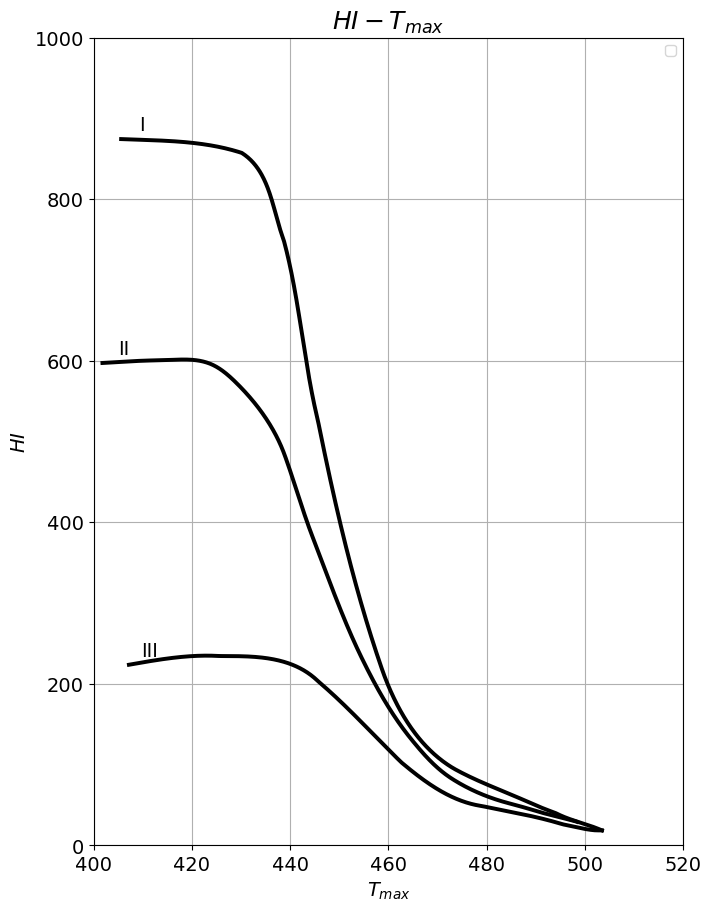

In [61]:
fig, ax = my_plot.plot(title="$HI-T_{max}$", labels=("$T_{max}$", "$HI$"), figsize=(7, 9), plot_areas=False, grid=True);

In [62]:
save

[(407.16228335319295, 80.51920264890921),
 (407.16228335319295, 143.1452491536164),
 (405.6522625068439, 328.27116689636364),
 (406.2994142981363, 283.439717570433),
 (404.7893934517873, 388.046432664271),
 (404.7893934517873, 388.046432664271),
 (405.86797977060803, 313.32735045438676),
 (405.86797977060803, 313.32735045438676),
 (405.43654524307976, 343.2149833383404),
 (405.0051107155515, 373.10261622229416),
 (405.43654524307976, 343.2149833383404),
 (405.0051107155515, 373.10261622229416),
 (405.6522625068439, 328.27116689636364),
 (406.2994142981363, 283.439717570433),
 (404.57367618802317, 402.99024910624786)]

In [63]:
for _, r in data.iterrows():
    ax.plot(r["Tmax"], r["HI"], 'bo', markersize=12)
    # ax.plot(r["Tmax_o"], r["HIo"], 'g.')

In [67]:
for tmax, hi in save:
    ax.plot(tmax, hi, 'go', markersize=12)

In [68]:
final = my_plot.classify_distance()

{0: [0], 1: [0], 2: [1], 3: [1], 4: [1], 5: [1], 6: [1], 7: [1], 8: [1], 9: [1], 10: [1], 11: [1], 12: [1], 13: [1], 14: [1]}


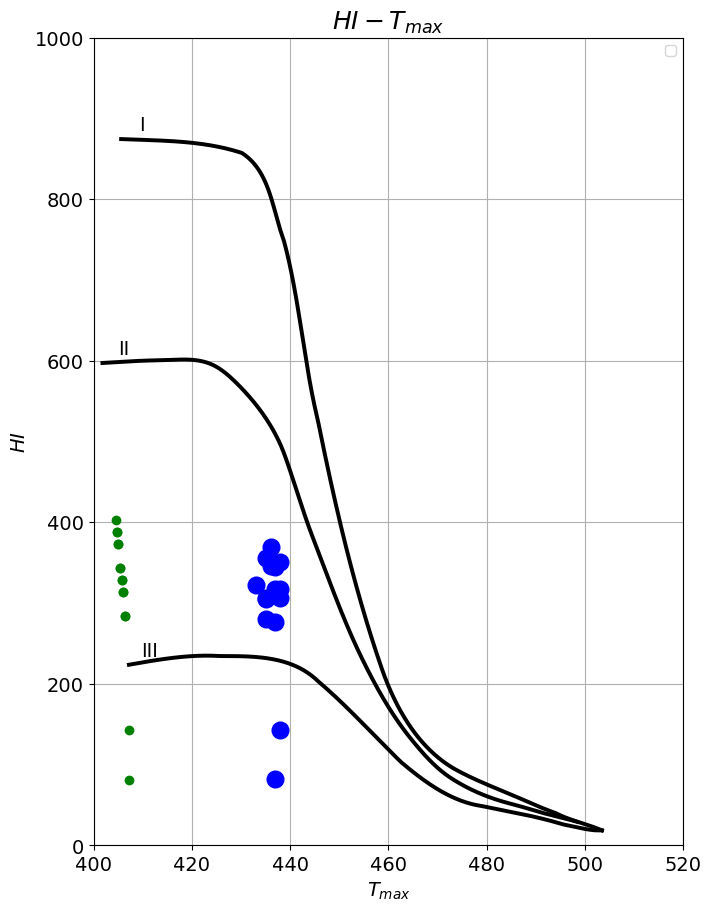

In [69]:
fig

In [32]:
pd.concat([data.reset_index(drop=True), pd.Series([f[1][0] for f in final], name=final[0][0]).explode(1)], axis=1)

,HI,Tmax,HIo,MATTER TYPE
0,82.0,437.0,"(407.16228335319295, 80.51920264890921)",III
1,143.0,438.0,"(407.16228335319295, 143.1452491536164)",III
2,323.0,433.0,"(405.6522625068439, 328.27116689636364)",II
3,280.0,435.0,"(406.2994142981363, 283.439717570433)",II
4,356.0,435.0,"(404.7893934517873, 388.046432664271)",II
5,351.0,438.0,"(404.7893934517873, 388.046432664271)",II
6,305.0,435.0,"(405.86797977060803, 313.32735045438676)",II
7,306.0,435.0,"(405.86797977060803, 313.32735045438676)",II
8,317.0,437.0,"(405.43654524307976, 343.2149833383404)",II
9,346.0,436.0,"(405.0051107155515, 373.10261622229416)",II


### Zeb, Sh & Zafar, M & Jehandad, S & Khan, T & Siyar, S & Qadir, A, 2020

In [137]:
data = my_data.table.loc[my_data.table["Well"] == "7122/6-1", ["TOC", "S2"]].dropna().iloc[:15]

In [138]:
data

,TOC,S2
5023,1.11,0.91
5024,2.56,3.67
5025,6.99,22.58
5026,3.40,9.52
5027,4.14,14.73
5028,4.13,14.49
5029,4.36,13.28
5030,5.02,15.34
5031,6.41,20.35
5032,4.66,16.11


In [139]:
svg_path = "D:/University/Магистратура/2 курс/Диплом/Графики/S2-TOC/Chen, z & Lavoie, D & Jiang, Ch & Duchesne, M & Malo, M, 2016.svg"

In [140]:
divider=True

In [141]:
svg_sample = digitizers.SVGParse.from_svg(svg_path, ((0, 0), (6, 27)))

In [142]:
my_plot = plots.Plot.from_dict(svg_sample.convert_to_dict(divider=True))

In [129]:
points = [plots.LabelledPoint(x, y) for x, y in zip(data["TOC"], data["S2"])]
my_plot.add_points(*points)

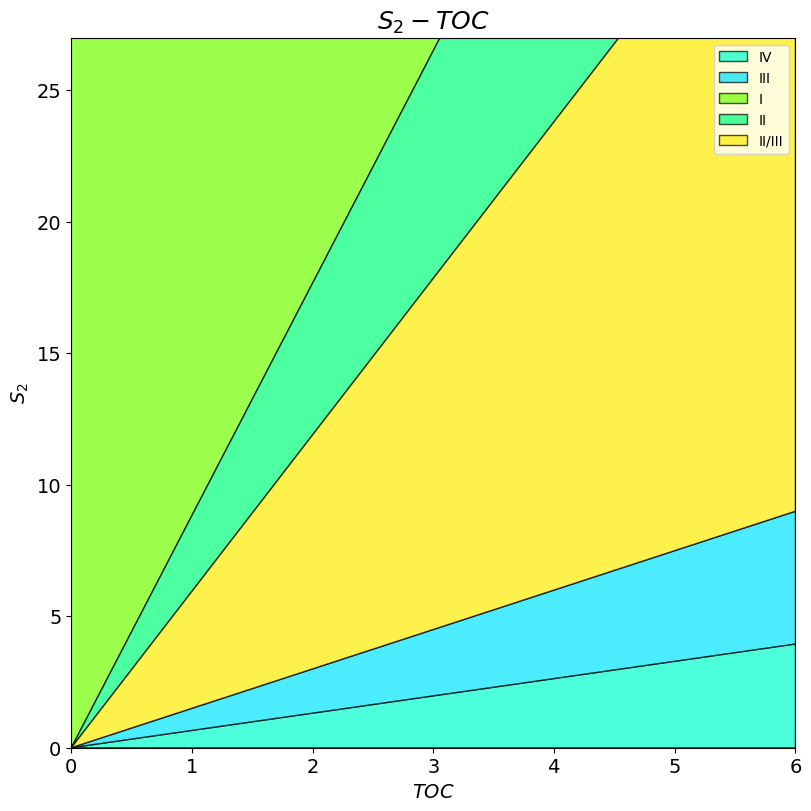

In [136]:
fig, ax = my_plot.plot(title="$S_2-TOC$", labels=("$TOC$", "$S_2$"), figsize=(8, 8), plot_areas=True, place="center", plot_curves=False);

In [143]:
for _, r in data.iterrows():
    ax.plot(r["TOC"], r["S2"], 'bo', markersize=12)
    # ax.plot(r["Tmax_o"], r["HIo"], 'g.')

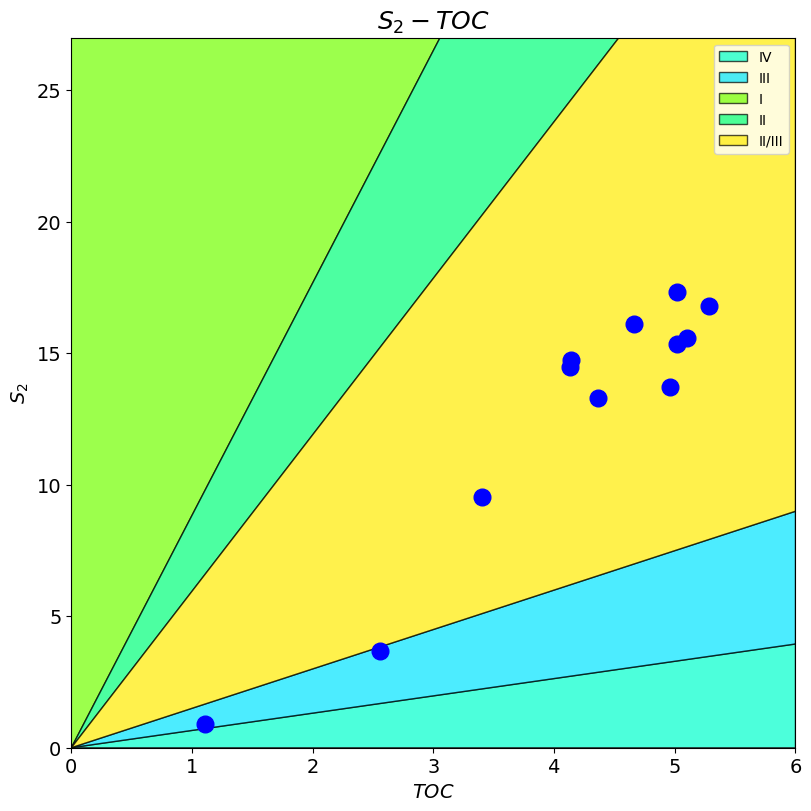

In [144]:
fig

In [133]:
final = my_plot.classify_area()

In [134]:
final

[('MATTER TYPE', 'III'),
 ('MATTER TYPE', 'III'),
 ('MATTER TYPE', 'II/III'),
 ('MATTER TYPE', 'II/III'),
 ('MATTER TYPE', 'II/III'),
 ('MATTER TYPE', 'II/III'),
 ('MATTER TYPE', 'II/III'),
 ('MATTER TYPE', 'II/III'),
 ('MATTER TYPE', 'II/III'),
 ('MATTER TYPE', 'II/III'),
 ('MATTER TYPE', 'II/III'),
 ('MATTER TYPE', 'II/III')]

In [122]:
pd.concat([data.reset_index(drop=True), pd.Series([f[1] for f in final], name=final[0][0]).explode(1)], axis=1)

,TOC,S2,MATTER TYPE
0,1.11,0.91,III
1,2.56,3.67,III
2,6.99,22.58,II/III
3,3.40,9.52,II/III
4,4.14,14.73,II/III
5,4.13,14.49,II/III
6,4.36,13.28,II/III
7,5.02,15.34,II/III
8,6.41,20.35,II/III
9,4.66,16.11,II/III


In [161]:
data = my_data.table.loc[my_data.table["Well"] == "7122/6-1", ["Tmax", "PI"]].dropna().iloc[:15]
data

,Tmax,PI
5023,437.0,0.05
5024,438.0,0.04
5025,433.0,0.06
5026,435.0,0.09
5027,435.0,0.04
5028,438.0,0.04
5029,435.0,0.01
5030,435.0,0.08
5031,437.0,0.05
5032,436.0,0.07


In [162]:
svg_path = "D:/University/Магистратура/2 курс/Диплом/Графики/PI-Tmax/Edress, N & Darwish, S & Ismail, A, 2021.svg"

In [163]:
divider=True

In [164]:
svg_sample = digitizers.SVGParse.from_svg(svg_path, ((400, 0), (520, 1)))

In [165]:
points = [plots.LabelledPoint(x, y) for x, y in zip(data["Tmax"], data["PI"])]
my_plot.add_points(*points)

In [166]:
svg_sample.convert_to_dict(log=False, divider=divider)

{'name': 'Edress, N & Darwish, S & Ismail, A, 2021',
 'title': 'PI-Tmax',
 'settings': {'xlim': (400, 520),
  'ylim': (0, 1),
  'log': False,
  'grid': True,
  'legend': True},
 'labels': {'MATURITY': ['Low Level Conversion',
   'High Level Conversion',
   'Immature',
   'Oil Window',
   'Oil Window',
   'Wet Gas Zone',
   'Wet Gas Zone',
   'Dry Gas Window']},
 'data': {'curves': {'MATURITY: Low Level Conversion, High Level Conversion': {'color': '#000000',
    'width': 2.0711811,
    'label': {'name': 'MATURITY',
     'value': ['Low Level Conversion', 'High Level Conversion'],
     'divider': True},
    'equation': {'curve_type': None, 'params': []},
    'points': {'x': [399.9395036918114,
      400.05962381340424,
      400.17974393498815,
      400.29986405656325,
      400.41998417812954,
      400.540104299687,
      400.66022442123574,
      400.78034454277565,
      400.90046466430687,
      401.0205847858293,
      401.1407049073431,
      401.2608250288481,
      401.38094515

In [167]:
my_plot = plots.Plot.from_dict(svg_sample.convert_to_dict(log=False, divider=divider))

In [168]:
my_plot.areas

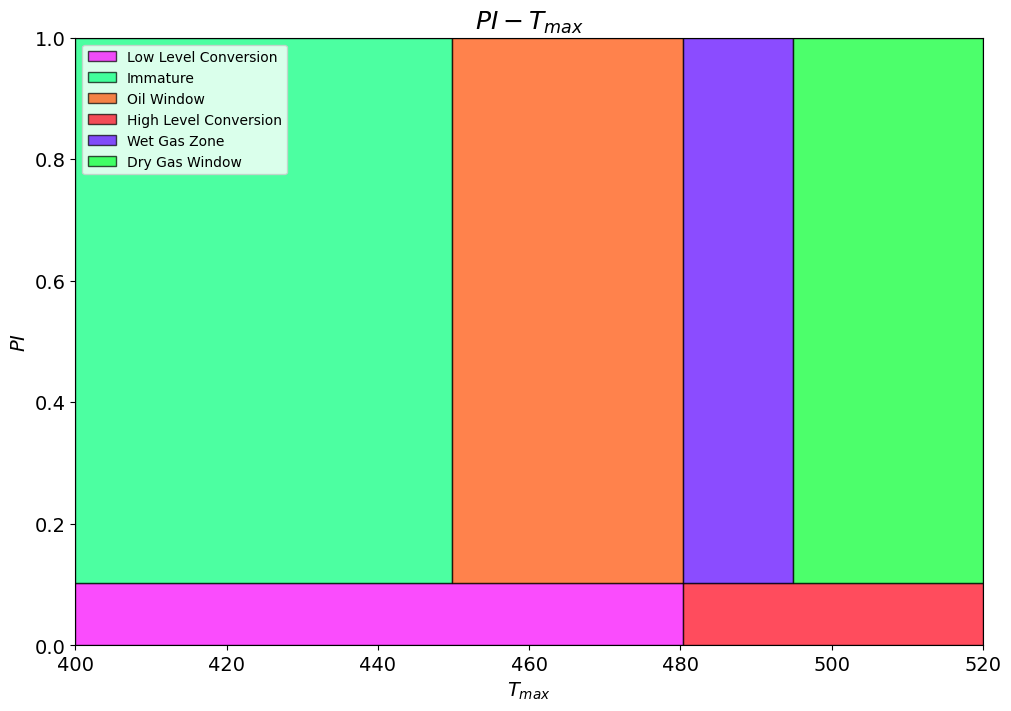

In [169]:
fig, ax = my_plot.plot(title="$PI-T_{max}$", labels=("$T_{max}$", "$PI$"), figsize=(10, 7), plot_areas=True, plot_curves=False, add_points=True);

In [170]:
my_plot.classify_area()

KeyError: "Either points or areas are not present in the 'Plot'"

In [134]:
my_plot.areas[0].label.name

'MATURITY'

In [129]:
for _, r in data.iterrows():
    ax.plot(r["Tmax"], r["PI"], 'b.')
    # ax.plot(r["Tmax_o"], r["HIo"], 'g.')

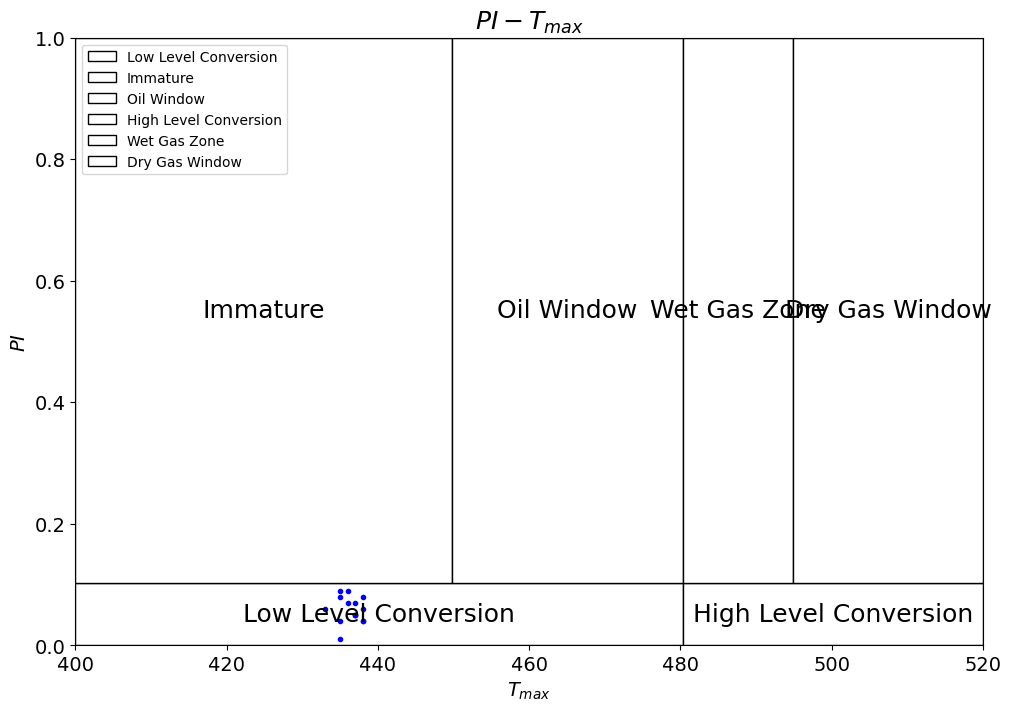

In [130]:
fig

In [80]:
data = my_data.table.loc[my_data.table["Well"] == "7321/8-1", ["OI", "HI"]].dropna().iloc[:15]
data

,OI,HI
11416,45.0,127.0
11417,20.0,114.0
11418,19.0,134.0
11420,29.0,146.0
11421,15.0,141.0
11422,20.0,70.0
11423,26.0,154.0
11425,24.0,85.0
11426,10.0,127.0
11427,17.0,184.0


In [81]:
svg_path = "D:/University/Магистратура/2 курс/Диплом/Графики/HI-OI/Hackley, P & Lunsdorf, N, 2018.svg"

In [82]:
svg_sample = digitizers.SVGParse.from_svg(svg_path, ((0, 0), (200, 1000)))

In [83]:
my_plot = plots.Plot.from_dict(svg_sample.convert_to_dict(divider=False))

In [84]:
points = [plots.LabelledPoint(x, y) for x, y in zip(data["OI"], data["HI"])]
my_plot.add_points(*points)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


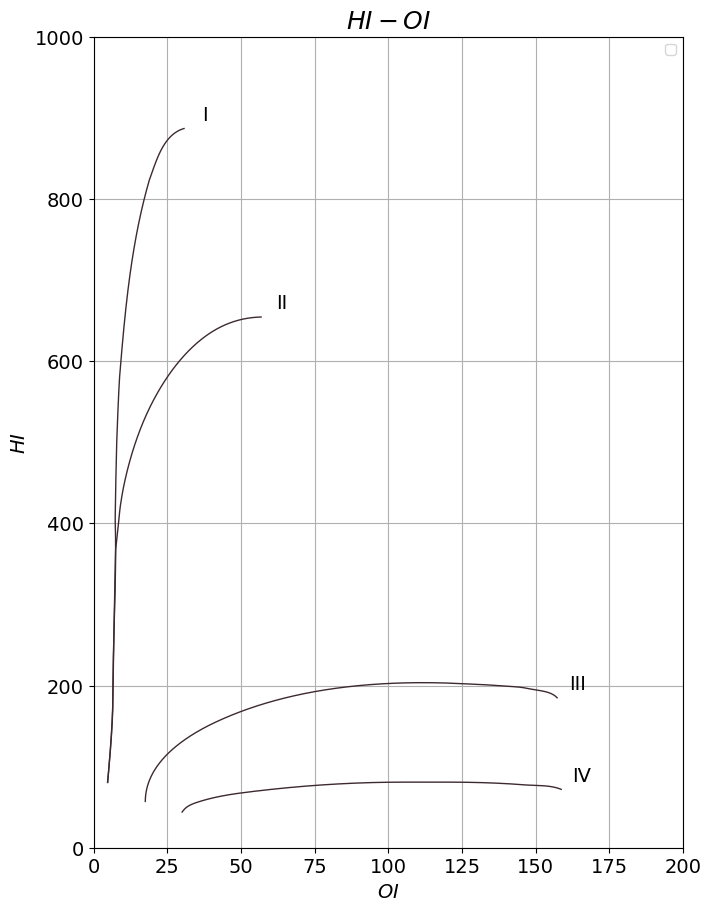

In [99]:
fig, ax = my_plot.plot(title="$HI-OI$", labels=("$OI$", "$HI$"), figsize=(7, 9), plot_areas=False, grid=True);

In [100]:
for _, r in data.iterrows():
    ax.plot(r["OI"], r["HI"], 'bo', markersize=12)
    # ax.plot(r["Tmax_o"], r["HIo"], 'g.')

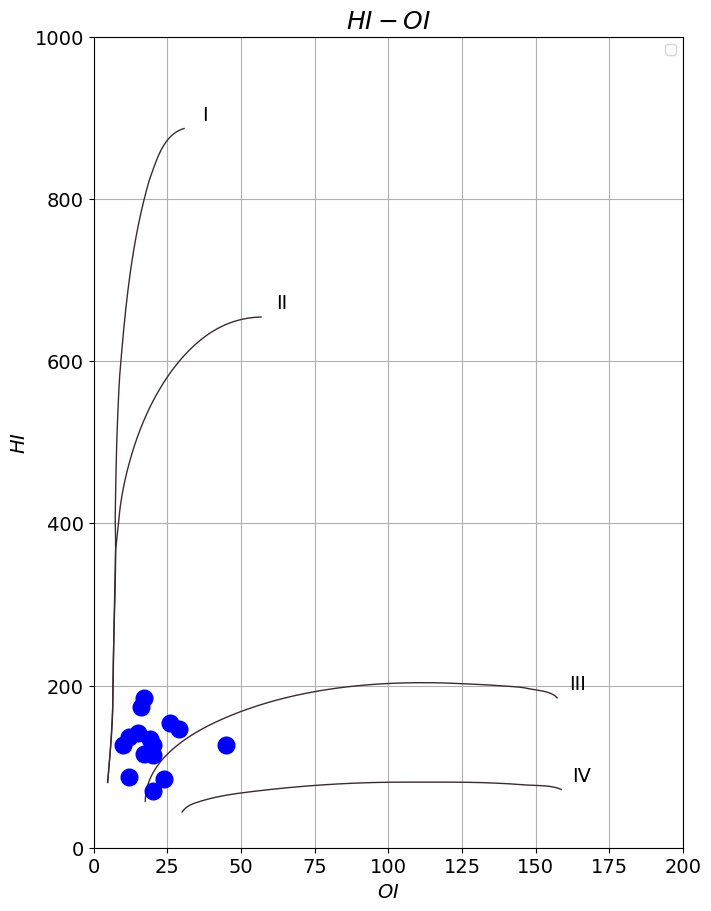

In [101]:
fig

In [102]:
pd.concat([data.reset_index(drop=True), pd.Series([f[1][0] for f in final], name=final[0][0]).explode(1)], axis=1)

,OI,HI,GENERATION POTENTIAL
0,45.0,127.0,P
1,20.0,114.0,F
2,19.0,134.0,V
3,29.0,146.0,G
4,15.0,141.0,V
5,20.0,70.0,V
6,26.0,154.0,V
7,24.0,85.0,V
8,10.0,127.0,V
9,17.0,184.0,V


In [31]:
data = my_data.table.loc[my_data.table["Well"] == "7122/6-1", ["TOC", "S1+S2"]].dropna().iloc[:15]
data

,TOC,S1+S2
5023,1.11,0.96
5024,2.56,3.84
5025,6.99,24.06
5026,3.40,10.51
5027,4.14,15.36
5028,4.13,15.16
5029,4.36,13.36
5030,5.02,16.64
5031,6.41,21.46
5032,4.66,17.25


In [32]:
svg_path = "D:/University/Магистратура/2 курс/Диплом/Графики/S1+S2-TOC/Spasennykh, M, Maglevannaia, P, Kozlova, E, Bulatov, T, Leushina, E, Morozov, N, 2021.svg"

In [33]:
divider=True

In [34]:
svg_sample = digitizers.SVGParse.from_svg(svg_path, ((0.1, 0.1), (100, 1000)))

In [35]:
my_plot = plots.Plot.from_dict(svg_sample.convert_to_dict(log=True, divider=divider))

In [36]:
points = [plots.LabelledPoint(x, y) for x, y in zip(data["TOC"], data["S1+S2"])]
my_plot.add_points(*points)

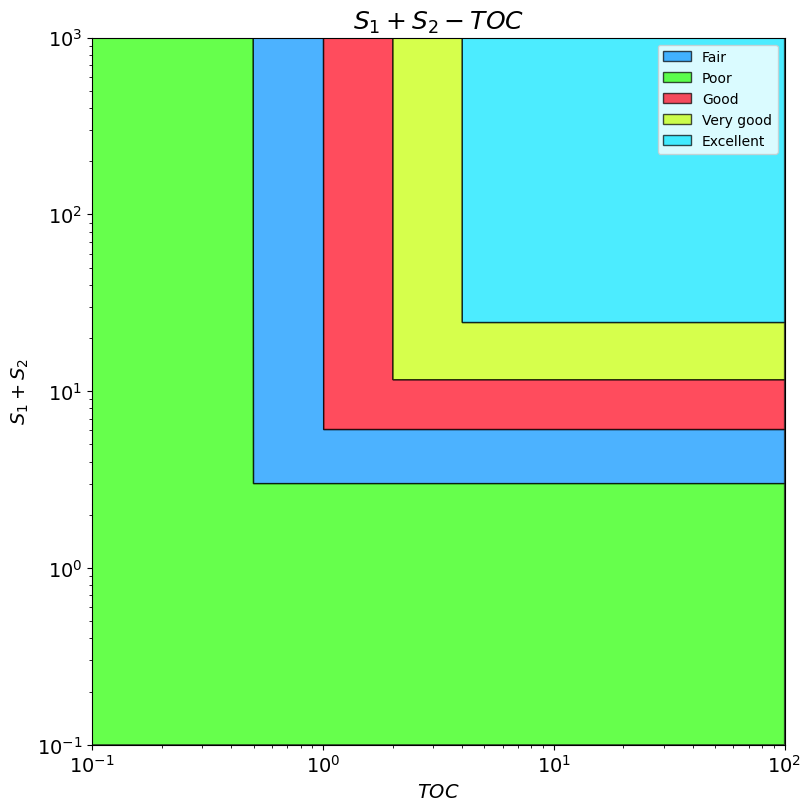

In [73]:
fig, ax = my_plot.plot(title="$S_1+S_2-TOC$", labels=("$TOC$", "$S_1+S_2$"), figsize=(8, 8), plot_areas=True, plot_curves=False, log=True);

In [74]:
for _, r in data.iterrows():
    ax.plot(r["TOC"], r["S1+S2"], 'bo', markersize=12)
    # ax.plot(r["Tmax_o"], r["HIo"], 'g.')

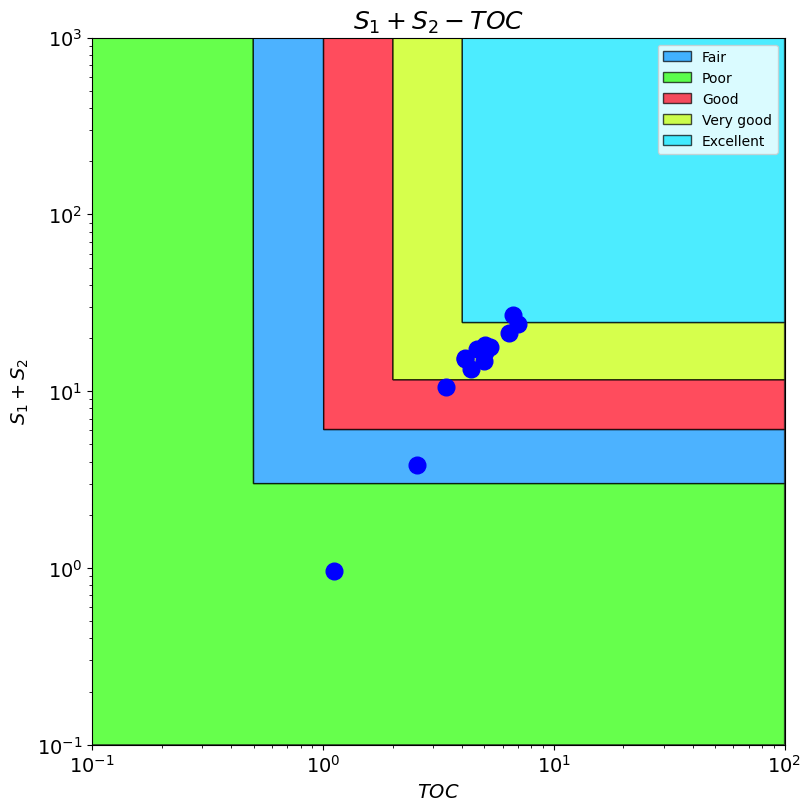

In [75]:
fig

In [76]:
final = my_plot.classify_area()

In [77]:
final

[('GENERATION POTENTIAL', 'Poor'),
 ('GENERATION POTENTIAL', 'Fair'),
 ('GENERATION POTENTIAL', 'Very good'),
 ('GENERATION POTENTIAL', 'Good'),
 ('GENERATION POTENTIAL', 'Very good'),
 ('GENERATION POTENTIAL', 'Very good'),
 ('GENERATION POTENTIAL', 'Very good'),
 ('GENERATION POTENTIAL', 'Very good'),
 ('GENERATION POTENTIAL', 'Very good'),
 ('GENERATION POTENTIAL', 'Very good'),
 ('GENERATION POTENTIAL', 'Very good'),
 ('GENERATION POTENTIAL', 'Very good'),
 ('GENERATION POTENTIAL', 'Very good'),
 ('GENERATION POTENTIAL', 'Very good'),
 ('GENERATION POTENTIAL', 'Excellent')]

In [78]:
pd.concat([data.reset_index(drop=True), pd.Series([f[1] for f in final], name=final[0][0]).explode(1)], axis=1)

,TOC,S1+S2,GENERATION POTENTIAL
0,1.11,0.96,Poor
1,2.56,3.84,Fair
2,6.99,24.06,Very good
3,3.40,10.51,Good
4,4.14,15.36,Very good
5,4.13,15.16,Very good
6,4.36,13.36,Very good
7,5.02,16.64,Very good
8,6.41,21.46,Very good
9,4.66,17.25,Very good
